In [1]:
!pip install Sastrawi
!pip install nlp-id
!pip install transformers
!pip install transformers torch
!pip install sentence-transformers
!pip install gradio

In [2]:
import nltk
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import random, json, re, datetime, os
import matplotlib.pyplot as plt
import sklearn
import sys
import transformers
import torch

import string


In [3]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.naive_bayes import GaussianNB
# from keras.optimizers import gradient_descent_v2
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.python.framework import ops
from sklearn import metrics
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn import preprocessing
from google.colab import drive
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import Dataset, random_split,DataLoader
from torch.nn.utils.rnn import pad_sequence
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from functools import lru_cache
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import evaluation
from sentence_transformers import util
from torch.utils.data import DataLoader
from sentence_transformers import SentenceTransformer, SentencesDataset, InputExample, losses
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# nltk.download('indonesian')
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
pd.set_option('display.max_columns', None)
# drive.mount('/content/drive')
# sys.path.append('/content/drive/My Drive/Colab Notebooks/IDSS_LEARN/Byu_model_train/')

In [6]:
# # Load JSON data
# with open('/content/drive/My Drive/Colab Notebooks/IDSS_LEARN/Byu_model_train/Datasets_copy.json', 'r') as file:
#     data = json.load(file)
# Load JSON data
with open('Datasets_copy.json', 'r') as file:
    data = json.load(file)


In [7]:
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")

# # Load the GPT-2 tokenizer
# tokenizer = GPT2Tokenizer.from_pretrained("cahya/gpt2-small-indonesian-522M")

# Create a Sastrawi stemmer
stemmer = StemmerFactory().create_stemmer()

def create_document(intents):
    all_words = []
    all_tags = []
    documents = []
    ignore = ['!', '.', '?', ',']

    for intent in intents['intents']:
        for pattern in intent['patterns']:
            w = tokenizer.encode(pattern, add_special_tokens=True)
            w = [tokenizer.decode(w_token) for w_token in w if tokenizer.decode(w_token) not in ignore]

            # Stem the words using Sastrawi
            w = [stemmer.stem(word) for word in w]

            all_words.extend(w)
            documents.append((w, intent['tag']))
            if intent['tag'] not in all_tags:
                all_tags.append(intent['tag'])

    all_words = [w.lower() for w in all_words if w not in ignore]
    all_words = sorted(list(set(all_words)))
    all_tags = sorted(list(set(all_tags)))
    return all_words, all_tags, documents

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [8]:
total_words, total_tags, total_documents = create_document(data)
print(total_words)
print("Total no. of distinc words: ",len(total_words))
print("Total no. of distinc tags: ",len(total_tags))
print("Total no. of documents: ",len(total_documents))

['', '-', '2', 'a', 'aah', 'ada', 'adalah', 'ade', 'adik', 'adil', 'ag', 'agak', 'agam', 'agama', 'agar', 'agenda', 'ah', 'aham', 'ahi', 'ahir', 'ahli', 'ai', 'aikan', 'aja', 'ajak', 'ajar', 'aji', 'ak', 'aka', 'akal', 'akan', 'akhir', 'akhirat', 'akiti', 'aksi', 'aku', 'akur', 'al', 'alami', 'alas', 'alkan', 'alu', 'am', 'amana', 'amat', 'amb', 'ambil', 'an', 'anak', 'ancam', 'anda', 'andal', 'ang', 'anggap', 'anggota', 'angguk', 'angi', 'antara', 'anti', 'anya', 'ap', 'apa', 'apabila', 'apakah', 'apalagi', 'apresiasi', 'arah', 'arannya', 'ark', 'arus', 'asa', 'asah', 'asal', 'asi', 'asuh', 'at', 'atas', 'atau', 'atur', 'au', 'auh', 'awal', 'awam', 'awat', 'ayah', 'ayak', 'back', 'bagai', 'bagaimana', 'bagi', 'bagus', 'bahagia', 'bahas', 'bahkan', 'bahwa', 'baik', 'bakal', 'banding', 'banget', 'bangga', 'bangun', 'bantu', 'banyak', 'bap', 'baru', 'batas', 'bawa', 'bawah', 'bayang', 'bayar', 'beban', 'bebas', 'beberapa', 'beda', 'begini', 'begitu', 'belakang', 'beli', 'belum', 'benar',

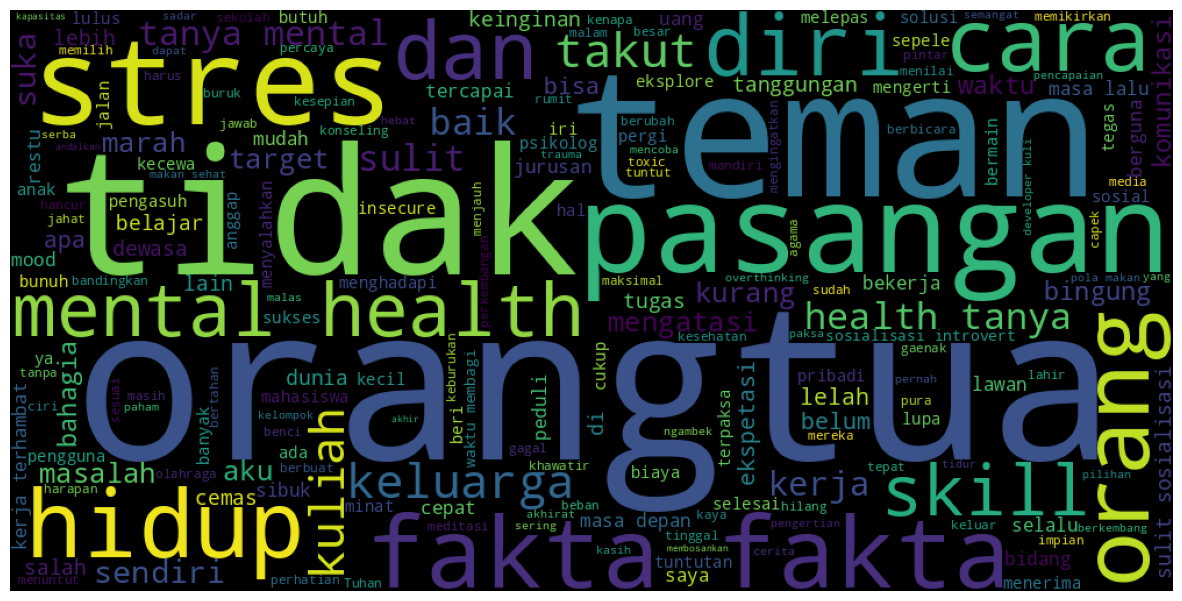

In [9]:
unique_string = (" ").join(total_tags)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Unique_Data"+".png",bbox_inches='tight')
plt.show()
plt.close()

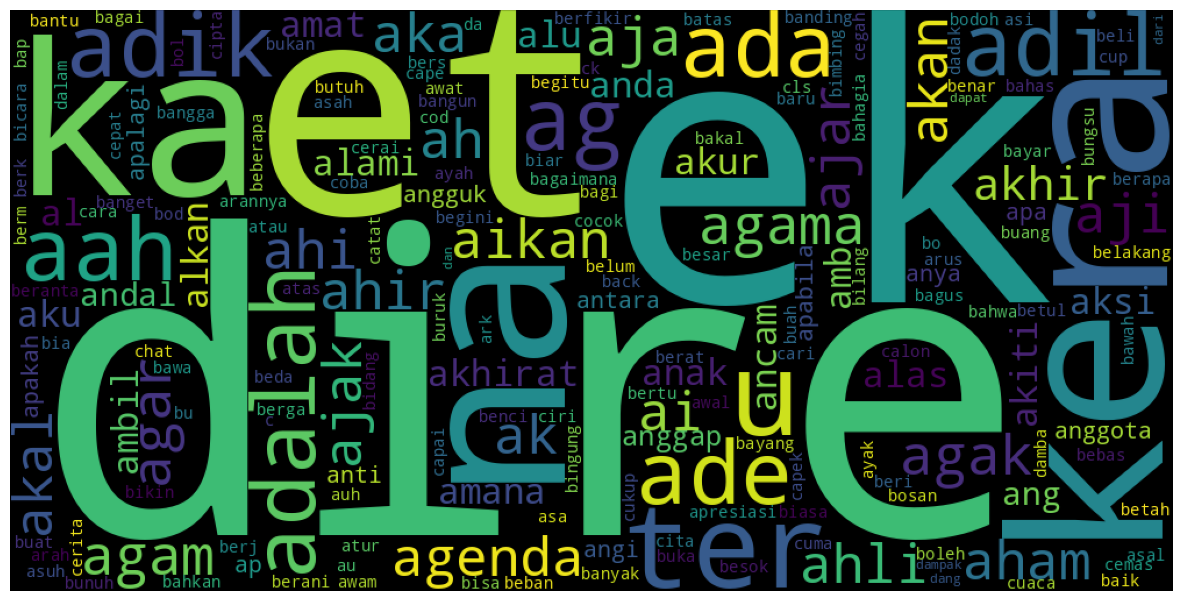

In [10]:
unique_string = (" ").join(total_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Unique_Data"+".png",bbox_inches='tight')
plt.show()
plt.close()

In [15]:
# def create_input_data(all_words, all_tags, documents):
#   training = []
#   output = []
#   output_empty = [0] * len(all_tags)
#   # print("output empty : ",output_empty)
#   op = [] # target variable naive bayes
#   for doc in documents :
#     bag = []
#     patterns_words = doc[0]
#     # stemming and stopwords removeal
#     pattern_words = [stemmer.stem(word.lower()) for word in patterns_words if not word in set(stopwords.words('indonesian'))]
#     pattern_words = [wordnet_lemmatizer.lemmatize(word) for word in patterns_words]
#     for w in all_words:
#       bag.append(1) if w in pattern_words else bag.append(0)
#     output_row = list(output_empty)
#     output_row[all_tags.index(doc[1])] = 1
#     training.append([bag,output_row])
#     op.append(doc[1])

#   training = np.array(training)
#   train_x = list(training[:,0])
#   train_y = list(training[:,1])

#   return train_x,train_y,op

def create_input_data(all_words, all_tags, documents):
    training = []
    output = []
    output_empty = [0] * len(all_tags)
    op = []  # target variable naive bayes
    for doc in documents:
        bag = []
        patterns_words = doc[0]
        # stemming and stopwords removal
        pattern_words = [stemmer.stem(word.lower()) for word in patterns_words if word not in set(stopwords.words('indonesian'))]
        pattern_words = [wordnet_lemmatizer.lemmatize(word) for word in pattern_words]
        for w in all_words:
            bag.append(1) if w in pattern_words else bag.append(0)
        output_row = list(output_empty)
        output_row[all_tags.index(doc[1])] = 1
        training.append(bag)
        output.append(output_row)
        op.append(doc[1])

    return training, output, op



In [16]:
full_x, full_y, full_op = create_input_data(total_words, total_tags, total_documents)
print(np.array(full_x).shape, np.array(full_y).shape, np.array(full_op).shape)

(1837, 976) (1837, 578) (1837,)


In [17]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih dan data test
train_x, val_x, train_y, val_y = train_test_split(
    full_x, full_y, test_size=0.1, random_state=42
)
# Memisahkan data uji menjadi data validasi (20%) dan data uji baru (20%)
val_x, test_x, val_y, test_y = train_test_split(
    val_x, val_y, test_size=0.5, random_state=42
)

print(np.array(train_x).shape, np.array(train_y).shape)
print(np.array(val_x).shape, np.array(val_y).shape)
print(np.array(test_x).shape, np.array(test_y).shape)

(1653, 976) (1653, 578)
(92, 976) (92, 578)
(92, 976) (92, 578)


**Model Initialisation and Implementation**

In [18]:
model_DNN = tf.keras.models.Sequential()
model_DNN.add(Dense(256, input_shape=(len(train_x[0]),), activation='relu'))
model_DNN.add(Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
model_DNN.add(tf.keras.layers.BatchNormalization())
model_DNN.add(Dropout(rate=0.4))
# model_DNN.add(Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='relu'))
model_DNN.add(Dense(256, activation='relu'))  # Menambah layer dan menyesuaikan jumlah unit
model_DNN.add(Dropout(rate=0.4))
model_DNN.add(Dense(256, activation='relu'))  # Menambah layer dan menyesuaikan jumlah unit
model_DNN.add(Dropout(rate=0.4))
# model_DNN.add(Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='relu'))
model_DNN.add(Dense(len(train_y[0]), activation='softmax'))

In [19]:
# inisialisasi stochastic gradient descent
sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9, decay=1e-6, nesterov=True)

# compile model
model_DNN.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
logdir = os.path.join("SURYAlogs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

history = model_DNN.fit(
    np.array(train_x),
    np.array(train_y),
    epochs=700,
    batch_size=32,
    verbose=1,
    callbacks=[tensorboard_callback],
    validation_data=(val_x, val_y)
)

Epoch 1/700
52/52 [==============================] - 4s 26ms/step - loss: 6.6646 - accuracy: 0.0042 - val_loss: 6.6081 - val_accuracy: 0.0217
Epoch 2/700
52/52 [==============================] - 1s 13ms/step - loss: 6.4806 - accuracy: 0.0248 - val_loss: 6.5953 - val_accuracy: 0.0109
Epoch 3/700
52/52 [==============================] - 1s 12ms/step - loss: 6.2360 - accuracy: 0.0448 - val_loss: 6.5677 - val_accuracy: 0.0326
Epoch 4/700
52/52 [==============================] - 1s 14ms/step - loss: 5.9245 - accuracy: 0.0702 - val_loss: 6.5079 - val_accuracy: 0.0652
Epoch 5/700
52/52 [==============================] - 1s 14ms/step - loss: 5.5780 - accuracy: 0.1053 - val_loss: 6.4144 - val_accuracy: 0.0870
Epoch 6/700
52/52 [==============================] - 0s 9ms/step - loss: 5.1503 - accuracy: 0.1458 - val_loss: 6.1807 - val_accuracy: 0.1196
Epoch 7/700
52/52 [==============================] - 0s 9ms/step - loss: 4.7597 - accuracy: 0.1718 - val_loss: 5.9216 - val_accuracy: 0.1087
Epoch 8/

In [20]:
model_DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               250112    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

**EVALUATION**

In [21]:
model_DNN.evaluate(test_x, test_y)

3/3 [==============================] - 0s 6ms/step - loss: 4.5139 - accuracy: 0.5761


[4.513898849487305, 0.5760869383811951]

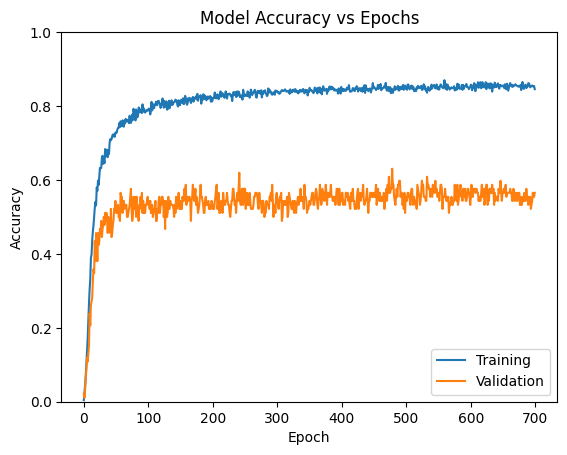

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
# Mengatur sumbu y dimulai dari 0 dan memiliki rentang dari 0 hingga nilai maksimum akurasi
plt.ylim(0, 1.0)
plt.show()

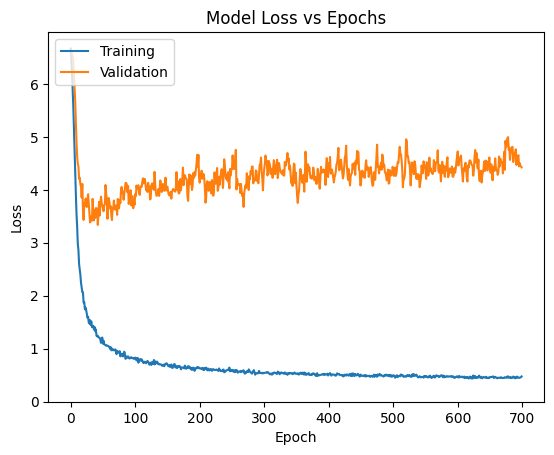

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(bottom=0)  # Mengatur sumbu y dimulai dari 0
plt.legend(['Training','Validation'], loc='upper left')

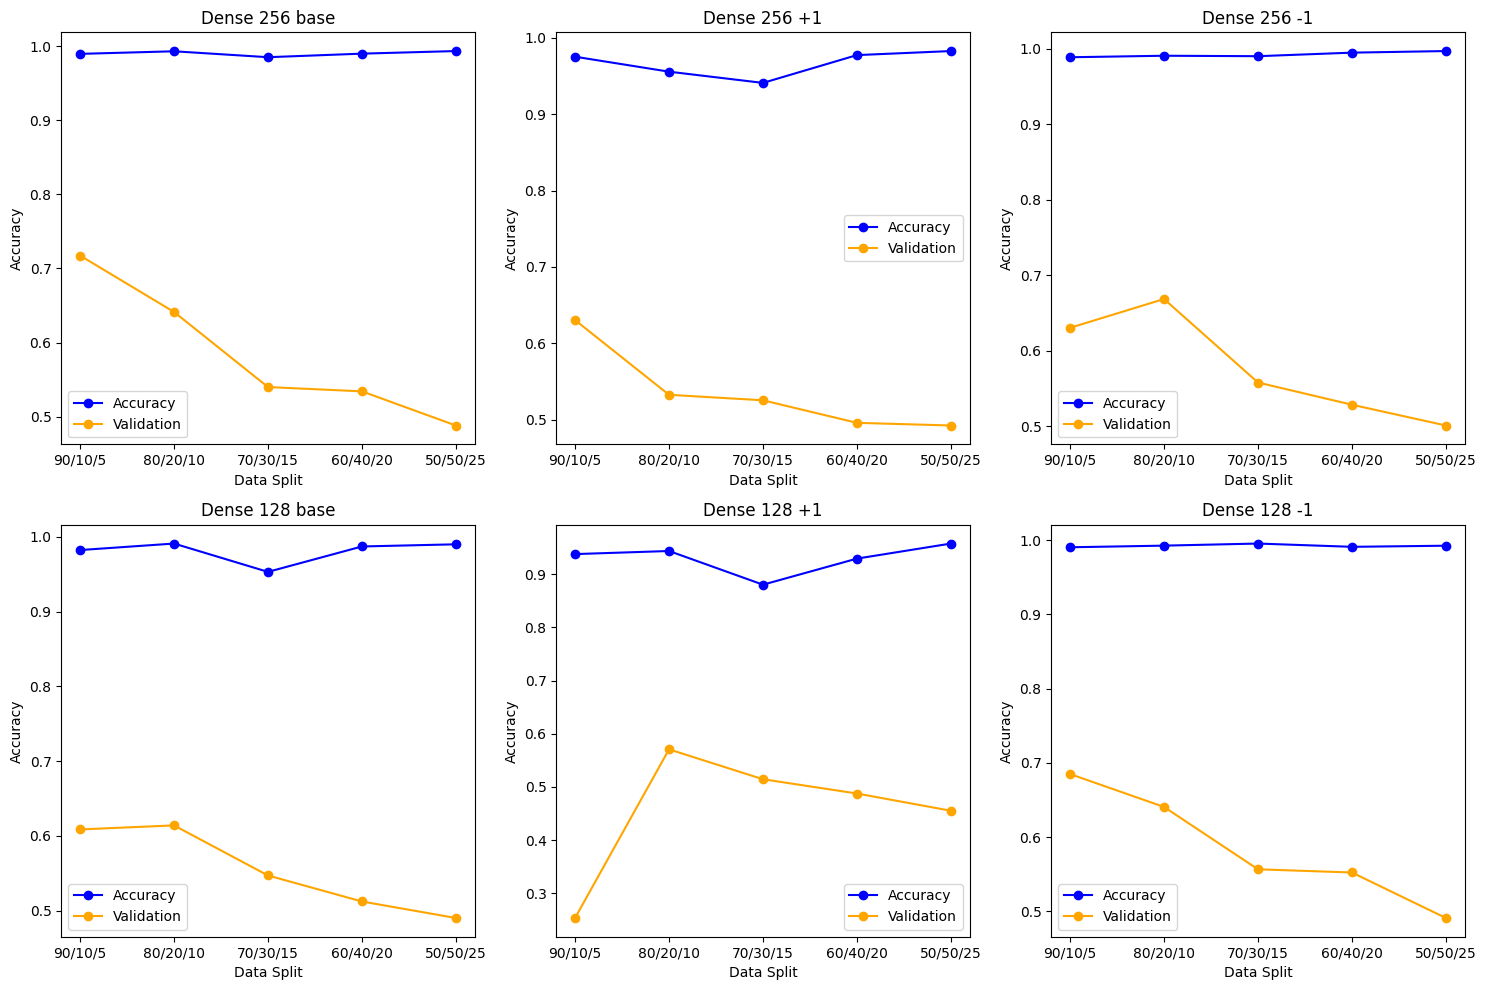

In [24]:
# # Dense 256
# dense_256_accuracies = [
#     [0.9903, 0.9905, 0.9914, 0.9927, 0.9946],
#     [0.9897, 0.9932, 0.9852, 0.9900, 0.9935],
#     [0.2880, 0.2001, 0.0514, 0.0191, 0.0153]
# ]

# dense_256_val_accuracy = [
#     [0.5870, 0.6359, 0.5399, 0.4122, 0.4924],
#     [0.7174, 0.6413, 0.5399, 0.5341, 0.4880],
#     [0.1630, 0.1141, 0.0435, 0.0082, 0.0065]
# ]

# # Dense 128
# dense_128_accuracies = [
#     [0.9776, 0.9891, 0.9743, 0.9855, 0.9880],
#     [0.0718, 0.9912, 0.9533, 0.9873, 0.9902],
#     [0.4307, 0.5024, 0.1665, 0.2786, 0.3366]
# ]

# dense_128_val_accuracy = [
#     [0.5652, 0.5815, 0.5326, 0.5177, 0.4641],
#     [0.6087, 0.6141, 0.5471, 0.5123, 0.4902],
#     [0.3587, 0.2609, 0.1449, 0.0954, 0.2004]
# ]

# # Dense 256 + 1 layer
# dense_256_1_accuracies = [
#     [0.9819, 0.8823, 0.9759, 0.9882, 0.9826],
#     [0.9752, 0.9556, 0.9409, 0.9773, 0.9826],
#     [0.0121, 0.0157, 0.0156, 0.0170, 0.0153]
# ]

# dense_256_1_val_accuracy = [
#     [0.6196, 0.6250, 0.5688, 0.4850, 0.4793],
#     [0.6304, 0.5326, 0.5254, 0.4959, 0.4924],
#     [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
# ]

# # Dense 128 + 1 layer
# dense_128_1_accuracies = [
#     [0.9220, 0.9074, 0.8887, 0.9129, 0.9040],
#     [0.9377, 0.9435, 0.8802, 0.9292, 0.9575],
#     [0.0913, 0.1055, 0.0156, 0.0390, 0.0479]
# ]

# dense_128_1_val_accuracy = [
#     [0.5543, 0.5435, 0.5109, 0.4632, 0.4444],
#     [0.2537 , 0.5707, 0.5145, 0.4877, 0.4553],
#     [0.1087, 0.1087, 0.0000, 0.0436, 0.0392
# ]

# # Dense 256 - 1 layer
# dense_256_minus_1_accuracies = [
#     [0.9903, 0.9912, 0.9914, 0.9955, 0.9935],
#     [0.9885, 0.9905, 0.9899, 0.9946, 0.9967],
#     [0.9873, 0.9884, 0.8778, 0.9809, 0.9793]
# ]

# dense_256_minus_1_val_accuracy = [
#     [0.6087, 0.6196, 0.5761, 0.5313, 0.4815],
#     [0.6304, 0.6685, 0.5580, 0.5286, 0.5011],
#     [0.5543, 0.5652, 0.1232, 0.4578, 0.3990]
# ]

# # Dense 128 - 1 layer
# dense_128_minus_1_accuracies = [
#     [0.9915, 0.9912, 0.9883, 0.9927, 0.9935],
#     [0.9903, 0.9925, 0.9953, 0.9909, 0.9924],
#     [0.9812, 0.9857, 0.9432, 0.9819, 0.9891]
# ]

# dense_128_minus_1_val_accuracy = [
#     [0.6087, 0.5978, 0.5543, 0.5095, 0.4619],
#     [0.6848, 0.6405, 0.5565, 0.5522, 0.4909],
#     [0.6242, 0.5680, 0.4395, 0.4675, 0.4317]
# ]

# Data Accuracies
dense_256_data = {
    'base': [
        [0.9897, 0.9932, 0.9852, 0.9900, 0.9935],
        [0.7174, 0.6413, 0.5399, 0.5341, 0.4880]
    ],
    '+1': [
        [0.9752, 0.9556, 0.9409, 0.9773, 0.9826],
        [0.6304, 0.5326, 0.5254, 0.4959, 0.4924]
    ],
    '-1': [
        [0.9885, 0.9905, 0.9899, 0.9946, 0.9967],
        [0.6304, 0.6685, 0.5580, 0.5286, 0.5011]
    ]
}

dense_128_data = {
    'base': [
        [0.9825, 0.9912, 0.9533, 0.9873, 0.9902],
        [0.6087, 0.6141, 0.5471, 0.5123, 0.4902]
    ],
    '+1': [
        [0.9377, 0.9435, 0.8802, 0.9292, 0.9575],
        [0.2537, 0.5707, 0.5145, 0.4877, 0.4553]
    ],
    '-1': [
        [0.9903, 0.9925, 0.9953, 0.9909, 0.9924],
        [0.6848, 0.6405, 0.5565, 0.5522, 0.4909]
    ]
}

data_splits = ['90/10/5', '80/20/10', '70/30/15', '60/40/20', '50/50/25']
learning_rates = ['Base', '+1 Layer', '-1 Layer']

colors = ['blue', 'orange']
labels = ['Accuracy', 'Validation']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, (dense_data, dense_label) in enumerate(zip([dense_256_data, dense_128_data], ['Dense 256', 'Dense 128'])):
    for j, (lr_type, acc_data) in enumerate(dense_data.items()):
        for k, (acc, color) in enumerate(zip(acc_data, colors)):
            axs[i, j].plot(data_splits, acc, marker='o', label=labels[k], color=color)

        axs[i, j].set_title(f'{dense_label} {lr_type}')
        axs[i, j].set_xlabel('Data Split')
        axs[i, j].set_ylabel('Accuracy')
        axs[i, j].legend()

plt.tight_layout()
plt.show()


In [25]:
#clean and process the incoming user queries
def clean_up_userQuery(sentence):
  sentence_words = nltk.word_tokenize(sentence)
  sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
  sentence_words = [wordnet_lemmatizer.lemmatize(word.lower()) for word in sentence_words]
  return sentence_words

#created word vector preprocessed words
def create_BoW(sentence, words, show_details = False):
  sentence_words = clean_up_userQuery(sentence)
  bag = [0]*len(words)
  for s in sentence_words:
    for i,w in enumerate(words):
      if w == s:
        bag[i] = 1
        if show_details == True:
          print("Word Found in the Bag : %s" % w)
  return(np.array(bag))


BERT TOKEN SIMILARITY()

In [26]:
class TokenSimilarity:

    def load_pretrained(self, from_pretrained: str = "indobenchmark/indobert-base-p1"):
        self.tokenizer = AutoTokenizer.from_pretrained(from_pretrained)
        self.model = AutoModel.from_pretrained(from_pretrained)

    def __cleaning(self, text: str):
        # Bersihkan tanda baca
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Bersihkan spasi ganda
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def __process(self, first_token: str, second_token: str):
        inputs = self.tokenizer([first_token, second_token],
                                max_length=self.max_length,
                                truncation=self.truncation,
                                padding=self.padding,
                                return_tensors='pt')

        attention = inputs['attention_mask']

        outputs = self.model(**inputs)

        # Dapatkan bobot dari lapisan terakhir sebagai embeddings
        embeddings = outputs[0]

        # Tambahkan dimensi lebih lalu perluas tensor
        mask = attention.unsqueeze(-1).expand(embeddings.shape).float()

        masked_embeddings = embeddings * mask

        # MEAN POOLING UNTUK DIMENSI KE-2
        summed = masked_embeddings.sum(1)
        counts = torch.clamp(mask.sum(1), min=1e-9)
        mean_pooled = summed / counts

        # Kembalikan mean pooling sebagai array numpy
        return mean_pooled.detach().numpy()

    def predict(self, first_token: str, second_token: str,
                return_as_embeddings: bool = False, max_length: int = 16,
                truncation: bool = True, padding: str = "max_length"):
        self.max_length = max_length
        self.truncation = truncation
        self.padding = padding

        first_token = self.__cleaning(first_token)
        second_token = self.__cleaning(second_token)

        mean_pooled_arr = self.__process(first_token, second_token)
        if return_as_embeddings:
            return mean_pooled_arr

        # Hitung kemiripan
        similarity = cosine_similarity([mean_pooled_arr[0]], [mean_pooled_arr[1]])

        return similarity

model = TokenSimilarity()
model.load_pretrained('indobenchmark/indobert-base-p1')

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

In [27]:
# Load intent data
def load_intent_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

intent_data = load_intent_data('Datasets_copy.json')


In [28]:
# Training data
train_examples = [InputExample(texts=[pattern], label=intent['tag']) for intent in intent_data['intents'] for pattern in intent['patterns']]

# Model "use-moments" (base model)
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [29]:
# Memanfaatkan lru_cache
@lru_cache(maxsize=None)
def calculate_similarity(input_token, pattern):
    return model.predict(input_token, pattern)[0][0]

In [30]:
# def train_model_with_input_token(intent_data, input_token):
#     # Mapping antara tag dan label numerik
#     tag_to_label = {intent['tag']: idx for idx, intent in enumerate(intent_data['intents'])}

#     # Training data
#     train_examples = []
#     for intent in intent_data['intents']:
#         for pattern in intent['patterns']:
#             label = tag_to_label[intent['tag']]

#             # Menambahkan input_token ke pola teks
#             pattern_with_input = f"{pattern} {input_token}"
#             train_examples.append(InputExample(texts=[pattern_with_input], label=float(label)))

#     # Create a model
#     model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#     # Define a batch size
#     batch_size = 32

#     # Define a dataloader
#     train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=batch_size)

#     # Define a loss function
#     train_loss = losses.CosineSimilarityLoss(model)

#     # Training the model
#     model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=2)


In [31]:
def match_intent(input_token, intent_data):
    input_embeddings = model.encode(input_token, convert_to_tensor=True)

    best_match = None
    best_similarity = -1  # Perhatikan bahwa similarity akan menjadi nilai -1 hingga 1.

    for intent in intent_data['intents']:
        for pattern in intent['patterns']:
            pattern_embedding = model.encode(pattern, convert_to_tensor=True)
            similarity = util.pytorch_cos_sim(input_embeddings, pattern_embedding)[0].item()

            if similarity > best_similarity:
                best_similarity = similarity
                best_match = (intent, pattern, similarity)

    return best_match

In [32]:
def chat():
    print("(Mulai Percakapan dengan Bot(quit/q/bye) untuk stop !)")
    while True:
        inp = input("Kamu : ")
        inp = inp.lower()
        if inp == "quit" or inp == "q" or inp == "bye":
            break
        else:
            best_match = match_intent(inp, intent_data)
            if best_match is not None:
                matched_intent, matched_pattern, similarity = best_match
                print(f"Token input cocok dengan intent: {matched_intent['tag']}")
                print(f"Pola terbaik: {matched_pattern}")
                print(f"Kemiripan: {similarity * 100:.2f}%")
                if similarity * 100 > 80:
                    send_matched_patterns(matched_pattern)
            else:
                # print("Tidak ada cocok intent ditemukan.")
                print("Bisa jelaskan lebih detail lagi ??")


In [33]:
def send_matched_patterns(inp):
  # print("INPUT YANG DI SEND : ", inp)
  inp = inp.lower()
  res = response(inp, show_details = False)
  cls = classify(inp)
  print("bot: ", res)
  print("\n")

In [34]:
context = {}
ERROR_TRESHOLD = 0.50
words = total_words
classes = total_tags

def classify(sentence):
  p = create_BoW(sentence, words, show_details = False)
  # print("SAMPAI CLASSIFY SETELAH BOW : ",sentence)
  results = model_DNN.predict(np.array([p]))[0]
  print("RESULTS : ",results)
  results = [[i,r] for i,r in enumerate(results) if r > ERROR_TRESHOLD]
  results.sort(key = lambda x : x[1], reverse = True)
  return_list = []
  for r in results:
    return_list.append((classes[r[0]],r[1]))
  return return_list

def response(sentence, userID='NCI', show_details=False):
    # print("SAMPAI DI INPUT RESPONSE : ",sentence)
    results = classify(sentence)
    # print("SETELAH CLASSIFY : ",results)
    if results:
        while results:
            for i in data['intents']:
                if i['tag'] == results[0][0]:
                    if 'context_set' in i:
                        if show_details:
                            print('context:', i['context_set'])
                        context[userID] = i['context_set']
                    if not 'context_filter' in i or \
                            (userID in context and 'context_filter' in i and i['context_filter'] == context[userID]):
                        if show_details:
                            print('Tag:', i['tag'])
                        return random.choice(i['responses'])
            results.pop(0)

In [35]:
model_DNN.save('model_chatbot.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
chat()

(Mulai Percakapan dengan Bot(quit/q/bye) untuk stop !)
Kamu : q


In [37]:
model_transformer = SentenceTransformer('paraphrase-MiniLM-L6-v2')
model_transformer.save('model_transformer.h5')

In [38]:
!pip install pyngrok
# !pip install -U gradio

In [39]:
# import shutil

# # Lokasi file model di Google Colab
# source_file = 'model_transformer.h5'

# # Lokasi tempat Anda ingin menyimpan di Google Drive
# destination_folder = '/content/drive/My Drive/Colab Notebooks/IDSS_LEARN/Byu_model_train/'

# # Pindahkan file model ke Google Drive
# shutil.move(source_file, destination_folder)


In [40]:
# from google.colab import files

# files.download('model_transformer.h5.zip')


In [41]:
# !pip install typing-extensions==3.10.0.2


In [42]:
# !pip install typing_extensions
# !pip install --upgrade typing_extensions
# !pip install --upgrade gradio


In [43]:
!pip show gradio

Name: gradio
Version: 4.31.0
Summary: Python library for easily interacting with trained machine learning models
Home-page: 
Author: 
Author-email: Abubakar Abid <gradio-team@huggingface.co>, Ali Abid <gradio-team@huggingface.co>, Ali Abdalla <gradio-team@huggingface.co>, Dawood Khan <gradio-team@huggingface.co>, Ahsen Khaliq <gradio-team@huggingface.co>, Pete Allen <gradio-team@huggingface.co>, Ömer Faruk Özdemir <gradio-team@huggingface.co>, Freddy A Boulton <gradio-team@huggingface.co>, Hannah Blair <gradio-team@huggingface.co>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiofiles, altair, fastapi, ffmpy, gradio-client, httpx, huggingface-hub, importlib-resources, jinja2, markupsafe, matplotlib, numpy, orjson, packaging, pandas, pillow, pydantic, pydub, python-multipart, pyyaml, ruff, semantic-version, tomlkit, typer, typing-extensions, urllib3, uvicorn
Required-by: 


In [46]:
import time
import json
import numpy as np
import gradio as gr
import nltk
import random
import tensorflow as tf

from sentence_transformers import SentenceTransformer, util
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import WordNetLemmatizer
from transformers import AutoTokenizer
from pyngrok import conf, ngrok

MODEL_TF = 'model_chatbot.h5' # load dari Drive bisa, dari files via bisa
MODEL_TORCH = 'model_transformer.h5/' # load dari Drive.

def load_intent_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data


intent_data = load_intent_data('Datasets_copy.json') # load dari Drive bisa, dari files via bisa
stemmer = StemmerFactory().create_stemmer()
wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")
model = SentenceTransformer(MODEL_TORCH)
modelTF = tf.keras.models.load_model(MODEL_TF)

def create_document(intents):
    all_words = []
    all_tags = []
    documents = []
    ignore = ['!', '.', '?', ',']

    for intent in intents['intents']:
        for pattern in intent['patterns']:
            w = tokenizer.encode(pattern, add_special_tokens=True)
            w = [tokenizer.decode(w_token) for w_token in w if tokenizer.decode(
                w_token) not in ignore]

            w = [stemmer.stem(word) for word in w]

            all_words.extend(w)
            documents.append((w, intent['tag']))
            if intent['tag'] not in all_tags:
                all_tags.append(intent['tag'])

    all_words = [w.lower() for w in all_words if w not in ignore]
    all_words = sorted(list(set(all_words)))
    all_tags = sorted(list(set(all_tags)))
    return all_words, all_tags, documents


total_words, total_tags, total_documents = create_document(intent_data)


def clean_up_userQuery(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    sentence_words = [wordnet_lemmatizer.lemmatize(
        word.lower()) for word in sentence_words]
    return sentence_words


def create_BoW(sentence, words, show_details=False):
    sentence_words = clean_up_userQuery(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i, w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details == True:
                    print("Word Found in the Bag : %s" % w)
    return (np.array(bag))


def match_intent(input_token, intent_data):
    input_embeddings = model.encode(input_token, convert_to_tensor=True)

    best_match = None
    best_similarity = -1

    for intent in intent_data['intents']:
        for pattern in intent['patterns']:
            pattern_embedding = model.encode(pattern, convert_to_tensor=True)
            similarity = util.pytorch_cos_sim(
                input_embeddings, pattern_embedding)[0].item()

            if similarity > best_similarity:
                best_similarity = similarity
                best_match = (intent, pattern, similarity)

    return best_match


context = {}
ERROR_TRESHOLD = 0.50
words = total_words
classes = total_tags

def send_matched_patterns(inp):
    inp = inp.lower()
    res = response(inp, show_details=False)
    cls = classify(inp)
    return res, cls


def classify(sentence):
    p = create_BoW(sentence, words, show_details=False)
    results = modelTF.predict(np.array([p]))[0]
    results = [[i, r] for i, r in enumerate(results) if r > ERROR_TRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    return return_list


def response(sentence, userID='NCI', show_details=False):
    results = classify(sentence)
    if results:
        while results:
            for i in intent_data['intents']:
                if i['tag'] == results[0][0]:
                    if 'context_set' in i:
                        if show_details:
                            print('context:', i['context_set'])
                        context[userID] = i['context_set']
                    if not 'context_filter' in i or \
                            (userID in context and 'context_filter' in i and i['context_filter'] == context[userID]):
                        if show_details:
                            print('Tag:', i['tag'])
                        return random.choice(i['responses'])
            results.pop(0)


def chatbot(inp, history):
    for i in range(len(inp)):
        time.sleep(0.1)
        inp = inp.lower()
        if inp == "quit" or inp == "q" or inp == "bye":
            yield "Terima kasih sudah menggunakan chatbot ini"
        else:
            best_match = match_intent(inp, intent_data)
            if best_match is not None:
                matched_intent, matched_pattern, similarity = best_match
                if similarity * 100 > 80:
                    send_matched_patterns(matched_pattern)
                    yield "Macia : " + send_matched_patterns(matched_pattern)[0]

port = "7860" # diisikan port pada gradio, caranya? jalankan ini 1 kali, lalu lihat "https://localhost:786x", nah 786x inilah port pada gradio.
#jika sudah tau portnya, hentikan proses ini atau di interrupt, dan ketik port gradio yang barusan aktif, lalu jalankan kembali proses ini.

conf.get_default().auth_token = "2YEVZBCTOPdGPfsVym6eJzceRUp_P9QXiG8DmMvvpUj29VJd" # di dapat dari dashboard ngrok.
# bagaimana cara mendapatkan authtoken? daftar akun -> pergi ke section getting started -> di klik sampai segitiga sampai muncul 2 sub section
# lalu pilih "Your Authtoken" -> pastekan deh aututokennya.

public_url = ngrok.connect(port).public_url
print(" * ngrok tunnel \"{}\" -> \"https://localhost:{}\"".format(public_url, port))

demo = gr.ChatInterface(chatbot, title="Chatbot Mental Health Mahasiswa").queue()

if __name__ == '__main__':
    demo.launch(share=False, debug=True)


 * ngrok tunnel "https://ed71-104-154-169-90.ngrok-free.app" -> "https://localhost:7860"
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 17ms/step
Keyboard interruption in main thread... closing server.
